# 2주차 과제 - Titanic Dataset 분석 

## 1) 탐색적 자료 분석 (데이터 로드 및 시각화) ###

In [1]:
import pandas as pd

# Dataset Load
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [2]:
train.head()

# Survived : survivor= 1, Pclass(Class of Passenger, 승객 등급)
# SibSp(number of sibling & spouse, 형제,배우자 수), Parch(number of parents & children, 부모님,자녀 수)
# Cabin(선실 번호), Embarked(탑승 장소) : S=Southhampton, C=Cherbourg, Q=Queenstown

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# Age, Cabin 정보가 많이 유실되어 preprocessing 필요

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
#각 catagory에 따른 생존자 합산
def chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    return df

# df.plot(kind='bar',stacked=True, figsize=(10,5))

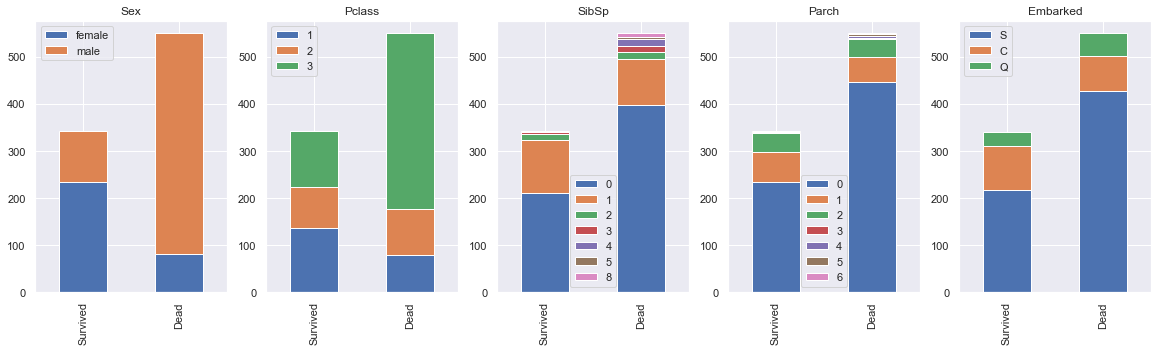

In [9]:
categ = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

import string

fig, axes = plt.subplots(ncols=5)

for i in range(5) :
    chart(categ[i]).plot(kind='bar', stacked = True, figsize=(20,5), ax=axes[i])
    axes[i].set_title(categ[i])

# 각각의 variable에 따른 생존률을 Subplot을 이용해 막대그래프로 시각화
# 생존률은 남자<여자, 1등석>2등석>3등석이다. (뱃머리 쪽인 3등석부터 가라앉았다고 한다)

## 2) Feature Engineering 

### (1) Name
> 이름에서 남성, 여성을 나타내는 Mr., Miss, Mrs 와 같은 정보를 추출해 분석

In [10]:
train_test_data = [train, test] #훈련 및 시험 데이터 세트 결합 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)
    
# 정규표현식 - [A-za-z] : 모든 알파벳, + : 반복, \. : 정규표현식에서 모든 문자를 뜻하는 . 이 아닌 string 그대로의 .을 찾음
# ([A-za-z]+)\. : '알파벳반복.' string을 찾되 ()안까지만 추출함 → Mr.를 찾지만 Mr까지만 추출

In [11]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [12]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [13]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [14]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

In [15]:
test['Title'].value_counts()

0.0    240
1.0     78
2.0     72
3.0     27
Name: Title, dtype: int64

<AxesSubplot:>

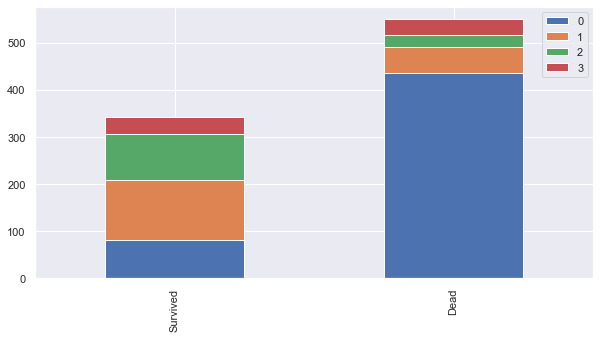

In [16]:
chart('Title').plot(kind='bar', stacked = True, figsize=(10,5))

### (2) Age
> 중간에 빠진 나이 정보가 많아 채워주어야 함  
→  전체 평균 나이를 채우기엔 나이 스펙트럼이 너무 넓음  
→  Mr의 평균나이, Miss끼리 평균나이, Mrs끼리 평균나이를 따로 구해 각각 채워줌

In [17]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

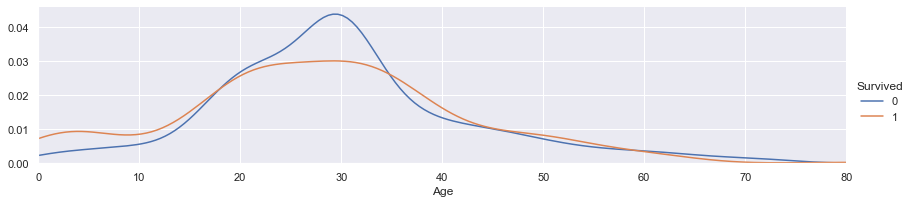

In [18]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)         # hue ; 색 구분
facet.map(sns.kdeplot, 'Age', shade=False)                     # seaborn.kdeplot : kernel density estimate, 분포 곡선
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

# 0~15살까지 생존률이 높다. 아이를 우선 구조했음을 추측할 수 있다.
# 30대와 70대의 사망률이 높다.

## (3) Embarked
> 도시별 경제 수준이 다른 것을 고려해 missing data를 채워넣을 수 있지 않을까?

<AxesSubplot:>

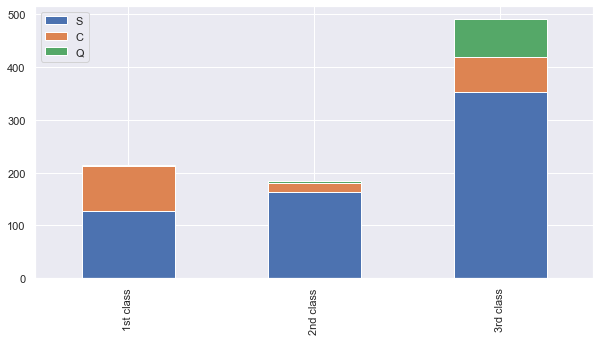

In [19]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [20]:
for dataset in train_test_data:
    print(dataset[dataset['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Title  
61   female  38.0      0      0  113572  80.0   B28      NaN      1  
829  female  62.0      0      0  113572  80.0   B28      NaN      2  
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title]
Index: []


In [21]:
# Embarked 값이 없는 두 승객의 경우 모두 1등급 승객임
# 1등급 승객의 경우 Embarked = S 인 승객이 가장 많으므로, 위 두 승객은 Embarked를 null에서 S로 입력

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [22]:
# 머신러닝 Classifier 분류을 사용하기 위해 텍스트를 숫자로 매핑

embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## (4) Fare
> 티켓 가격은 Pclass와 연관성이 높다. 따라서 각 class의 티켓 가격 평균값을 결측치에 넣어준다

In [23]:
import numpy as np
train["Fare"] = train["Fare"].replace(0, np.NaN)
test["Fare"] = test["Fare"].replace(0, np.NaN)

# Data를 살펴보니 결측치가 공백이 아닌, 0으로 되어 있어 0을 NaN으로 전부 매핑함
# 아래 fillna를 통해 한 번에 입력해주기 위함

In [24]:
train["Fare"].replace(0, np.NaN)
test["Fare"].replace(0, np.NaN)

train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

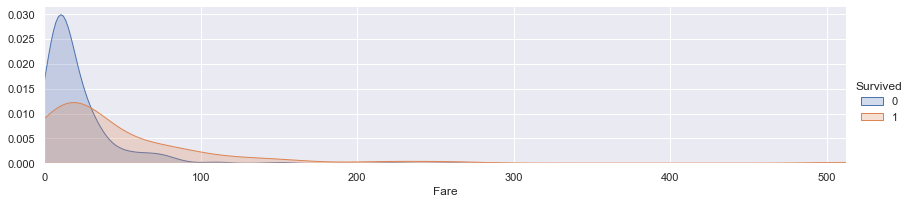

In [25]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

# 싼 티켓을 구매한 사람은 사망률이 높고 비싼 티켓을 구매한 사람은 생존률이 높다

In [26]:
# 마찬가지로 머신러닝을 위해 연속 변수를 구간별로 분리해 줄 필요가 있다.

for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

## (5) Cabin
> 선실은 문자+번호로 이루어져 있다. 번호는 다루기 어렵고 문자열과 PClass와 연관이 있어 문자열을 분석한다.

In [27]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

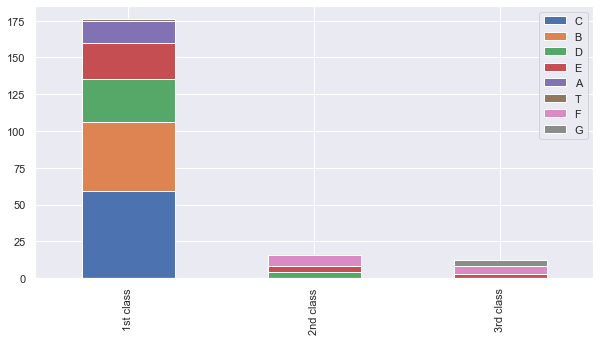

In [29]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

# 1등급은 ABCDET, 2등급은 DEF, 3등급은 EFG로 구성

In [31]:
# 마찬가지로 머신러닝을 위해 매핑을 시켜줌
# 유클리디안 거리를 사용하므로 변수별로 값의 차이가 크면 안됨
# 소숫점을 이용해 feature scaling

cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [32]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

# 클래스별 Cabin의 중간값을 결측치에 넣어줌

## (6) FamilySize
> SibSb와 Parch는 사망률 추이가 비슷했으므로, 혼자 탔는지 가족과 같이 탔는지를 분석하기 위해 SibSb와 Parch를 합쳐 feature를 만든다

In [33]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

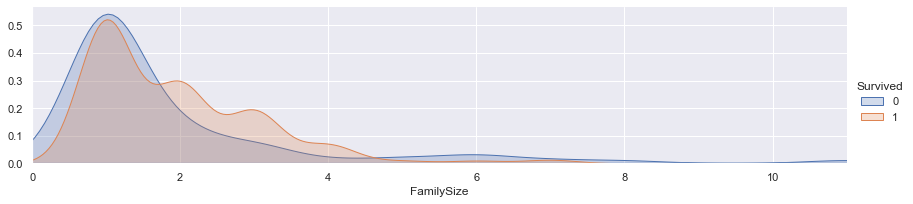

In [34]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

# 가족이 한명이라도 있을경우 사망률이 많이 줄어듦

In [35]:
# FamilySize mapping

family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [36]:
# Ticket 데이터는 생존과 상관이 없어 제거
# SibSp와 Parch는 합쳐 FamilySize라는 feature를 만들었으니 삭제

features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [37]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

# 생존 여부를 따로 target으로 만들어 labeling
# 머신러닝을 위한 데이터 전처리 완료

((891, 9), (891,))

머신러닝을 Classifier를 통해 예측할 수 있도록 데이터를 구성하였다.